# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gc
import math
from reduce_mem_usage import reduce_mem_usage
import glob

# Japanese font setting
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'Noto Sans CJK JP']

from sklearn.ensemble import RandomForestClassifier
import pickle

# enlarge plot
# plt.rcParams['figure.figsize'] = (20, 7)

# HOUR = 1
HOUR = 24

CLASSIFIER = 'randomforest'

TARGET = 'outcome1'
# TARGET = 'dos_within_1d'
# TARGET = 'dos_within_2d'
# TARGET = 'dos_within_3d'
# TARGET = 'dos_within_1w'
# TARGET = 'dos_more_2w'

DROP_SOFA_APACHE = False

FEATURE = None
# FEATURE = ['SOFA_score', 'apache2_score', 'apache2_est_mortality']
# FEATURE = ['SOFA_score']
# FEATURE = ['apache2_score']
# FEATURE = ['apache2_est_mortality']
# FEATURE = ['HR','Lac','NBPs','NBPd','RR','PLT','UN','SpO2']
# FEATURE = ['Lac','HR','NBPs','NBPd','Glu','axillary_temperature','Pulse','LDH']

# read data

In [2]:
index_col = ['pID','Ent_datetime']

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(10):
    # train
    if TARGET == 'outcome1':
        file_train = '../../../data/patient/imputation4/outcome1_train_{}h_{}.txt'.format(HOUR, i)
        file_test = '../../../data/patient/imputation4/outcome1_test_{}h_{}.txt'.format(HOUR, i)
    else:
        file_train = '../../../data/patient/imputation4/days_of_stay_train_{}h_{}.txt'.format(HOUR, i)
        file_test = '../../../data/patient/imputation4/days_of_stay_test_{}h_{}.txt'.format(HOUR, i)

    df_train = pd.read_table(file_train, low_memory=False, index_col=index_col)
    df_test = pd.read_table(file_test, low_memory=False, index_col=index_col)

    if TARGET == 'outcome1':
        del_cols = ['dos_within_1d', 'dos_within_2d', 'dos_within_3d', 'dos_within_1w', 'dos_more_2w']
        df_train.drop(del_cols,axis=1,inplace=True)
        df_test.drop(del_cols,axis=1,inplace=True)
    elif TARGET != 'outcome1':
        del_cols = ['dos_within_1d', 'dos_within_2d', 'dos_within_3d', 'dos_within_1w', 'dos_more_2w']
        del_cols.remove(TARGET)
        df_train.drop(del_cols,axis=1,inplace=True)
        df_test.drop(del_cols,axis=1,inplace=True)

    if DROP_SOFA_APACHE:
        drop_cols = ['SOFA_score','apache2_score','apache2_est_mortality']
        df_train.drop(drop_cols,axis=1,inplace=True)
        df_test.drop(drop_cols,axis=1,inplace=True)

    if FEATURE is not None:
        df_train = df_train[[TARGET] + FEATURE]
        df_test = df_test[[TARGET] + FEATURE]

    X_train.append(df_train.drop(TARGET,axis=1))
    y_train.append(df_train[TARGET].astype(int))
    X_test.append(df_test.drop(TARGET,axis=1))
    y_test.append(df_test[TARGET].astype(int))

# train

In [3]:
def train(i):
    
    if TARGET == 'outcome1':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': None,
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': min(62,len(X_test[i].columns)),
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
    elif TARGET == 'dos_within_1d':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': min(31,len(X_test[i].columns)),
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
    elif TARGET == 'dos_within_2d':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': min(31,len(X_test[i].columns)),
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
    elif TARGET == 'dos_within_3d':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'max_depth': None,
            'max_features': 'auto',
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
    elif TARGET == 'dos_within_1w':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'max_depth': 5,
            'max_features': min(8,len(X_test[i].columns)),
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
    elif TARGET == 'dos_more_2w':
        params = {
            'bootstrap': True,
            'ccp_alpha': 0.0,
            'class_weight': 'balanced',
            'criterion': 'gini',
            'max_depth': 15,
            'max_features': 'auto',
            'max_leaf_nodes': None,
            'max_samples': None,
            'min_impurity_decrease': 0.0,
            'min_impurity_split': None,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'n_estimators': 1000,
            'n_jobs': 6,
            'oob_score': False,
            'random_state': i,
            'verbose': 1,
            'warm_start': False
        }
        
    model = RandomForestClassifier(**params)
    
    model.fit(X_train[i], np.array(y_train[i]))
    
    return model
    
model = []
for i in range(10):
    model.append(train(i))
#     break

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   28.6s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:   36.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:   29.0s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:   37.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    7.4s
[Paral

# grid search

In [4]:
from sklearn.model_selection import GridSearchCV

if False:
    # scoring = 'accuracy'
    scoring = 'roc_auc'

    params = {
        'bootstrap': [True],
        'class_weight': [None,'balanced'],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 3, 4, 5],
        'max_features': ['auto', round(math.sqrt(len(X_train.columns))/4),round(math.sqrt(len(X_train.columns))/2),round(math.sqrt(len(X_train.columns))*2),round(math.sqrt(len(X_train.columns))*4)],
        'max_leaf_nodes': [None],
        'min_impurity_decrease': [0.0],
        'min_impurity_split': [None],
        'min_weight_fraction_leaf': [0.0],
        'n_estimators': [100,500,1000,5000],
        'n_jobs': [6],
        'oob_score': [False],
        'random_state': [1],
        'verbose': [1],
        'warm_start': [False]
    }

    gs = GridSearchCV(RandomForestClassifier(), params, scoring=scoring, verbose=2)
    gs.fit(X_train, y_train)

    gs_result = pd.DataFrame.from_dict(gs.cv_results_)
    model = gs.best_estimator_

#     gs_result.to_csv('../../../data/patient/union_outcome1/result/grid_search_result_outcome1_{}_group{}.txt'.format(CLASSIFIER, GROUP_NO), sep='\t', index=False)
#     pickle.dump(model, open('../../../data/patient/union_outcome1/result/model_outcome1_{}_group{}.pickle'.format(CLASSIFIER, GROUP_NO), 'wb'))

#     pred = model.predict(X_test)

    gs_result

# importance

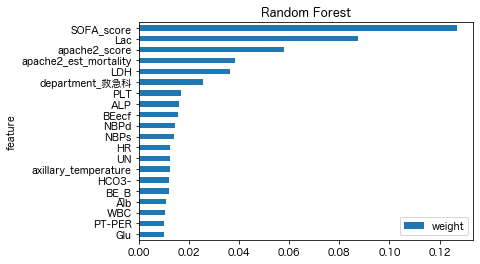

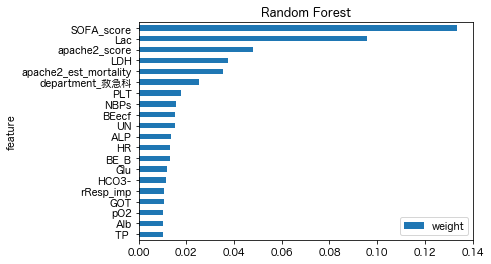

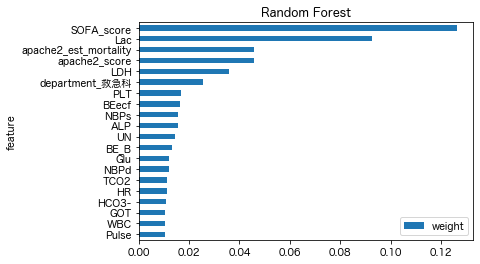

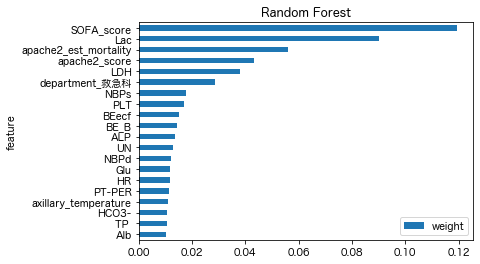

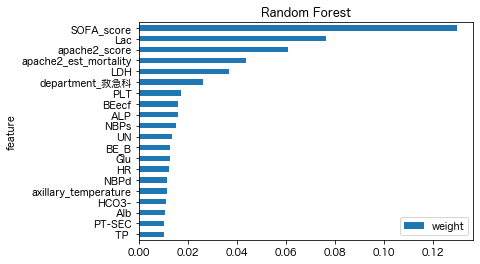

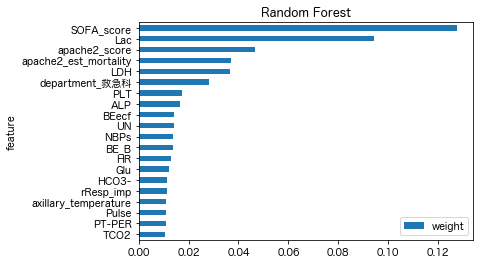

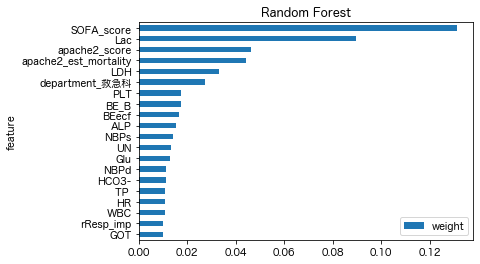

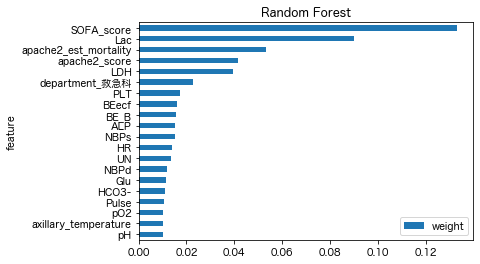

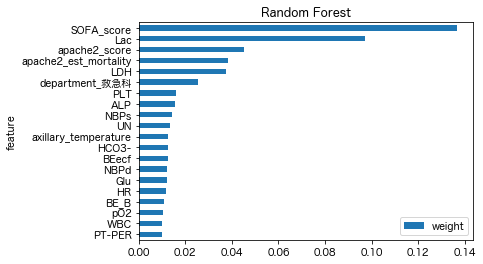

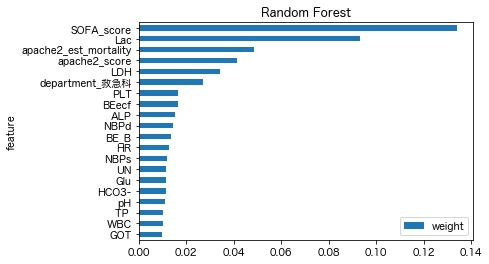

In [5]:
IMPORTANCES_BASE = '../../../data/patient/imputation4/result/variable_importances/{}_{}_{}h'\
    .format(TARGET, CLASSIFIER, HOUR)

def importance(i):
    df_feature = pd.DataFrame(X_train[i].columns, columns=['feature'])
    df_weight = pd.DataFrame(model[i].feature_importances_, columns=['weight'])
    df_importance = pd.concat([df_feature, df_weight],axis=1).sort_values('weight', ascending=False)

    df_importance.to_csv('{}/variable_importances_{}_{}_{}h_{}.txt'\
        .format(IMPORTANCES_BASE,TARGET, CLASSIFIER, HOUR, i), sep='\t', index=False)
    df_importance.head(20).sort_values('weight').plot.barh(x='feature', y='weight',title='Random Forest')

for i in range(10):
    importance(i)

In [6]:
# get mean
files = glob.glob('{}/*'.format(IMPORTANCES_BASE))
files.sort()

df_total = pd.DataFrame()
for f in files:
    if f.endswith('_mean.txt'):
        continue
    print(f.split('/')[-1])
    df_ = pd.read_table(f, sep='\t')
    df_total = pd.concat([df_total, df_], axis=0)

df_mean = df_total.groupby('feature', as_index=False).mean().sort_values('weight', ascending=False)
df_mean.to_csv('{}/variable_importances_{}_{}_{}h_mean.txt'\
    .format(IMPORTANCES_BASE,TARGET, CLASSIFIER, HOUR), sep='\t', index=False)

variable_importances_outcome1_randomforest_24h_0.txt
variable_importances_outcome1_randomforest_24h_1.txt
variable_importances_outcome1_randomforest_24h_2.txt
variable_importances_outcome1_randomforest_24h_3.txt
variable_importances_outcome1_randomforest_24h_4.txt
variable_importances_outcome1_randomforest_24h_5.txt
variable_importances_outcome1_randomforest_24h_6.txt
variable_importances_outcome1_randomforest_24h_7.txt
variable_importances_outcome1_randomforest_24h_8.txt
variable_importances_outcome1_randomforest_24h_9.txt


# ROC

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s


AUC= 0.9508230452674896


[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished


AUC= 0.9459807956104251


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


AUC= 0.9447719478737997


[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


AUC= 0.9473696844993141


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s


AUC= 0.9517524005486968


[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s


AUC= 0.9467335390946503


[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


AUC= 0.9421004801097395


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s


AUC= 0.9486831275720164


[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


AUC= 0.9492421124828533


[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.2s finished


AUC= 0.9513940329218107
[0.9508230452674896, 0.9459807956104251, 0.9447719478737997, 0.9473696844993141, 0.9517524005486968, 0.9467335390946503, 0.9421004801097395, 0.9486831275720164, 0.9492421124828533, 0.9513940329218107]
AUC 95% CI= [0.94270156 0.95167177]


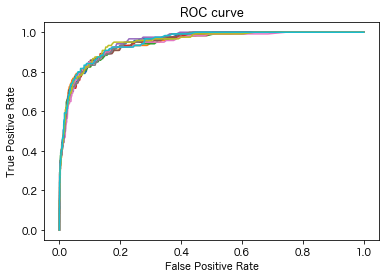

In [13]:
from sklearn import metrics
from sklearn.metrics import roc_curve

ROC_BASE = '../../../data/patient/imputation4/result/roc/{}_{}_{}h'\
    .format(TARGET, CLASSIFIER, HOUR)

def roc(i):
    pp = model[i].predict_proba(X_test[i])[:,1]
    fpr, tpr, threshold = roc_curve(y_test[i].values, pp)

    # save roc data
    df_roc = pd.DataFrame(y_test[i])
    df_roc.columns = ['test']
    df_roc['predict'] = pp
    df_roc.to_csv('{}/roc_{}_{}_{}h_{}.txt'
        .format(ROC_BASE,TARGET, CLASSIFIER, HOUR, i), sep='\t', index=False)

    # AUC
    auc = metrics.auc(fpr, tpr)
    print('AUC=', auc)

    # ROC curve
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    return auc

auc_list = []
for i in range(10):
    auc_list.append(roc(i))

print(auc_list)
print('AUC 95% CI= {}'.format(np.percentile(auc_list, (2.5, 97.5))))

In [14]:
# get mean
files = glob.glob('{}/*'.format(ROC_BASE))
files.sort()

df_total = pd.DataFrame()
for f in files:
    if f.endswith('_mean.txt'):
        continue
    print(f.split('/')[-1])
    df_ = pd.read_csv(f, sep='\t')
    df_total = pd.concat([df_total, df_], axis=0)

df_mean = df_total.reset_index().groupby('index', as_index=False).mean().drop('index',axis=1)
df_mean.to_csv('{}/roc_{}_{}_{}h_mean.txt'\
    .format(ROC_BASE,TARGET, CLASSIFIER, HOUR), sep='\t', index=False)

roc_outcome1_randomforest_24h_0.txt
roc_outcome1_randomforest_24h_1.txt
roc_outcome1_randomforest_24h_2.txt
roc_outcome1_randomforest_24h_3.txt
roc_outcome1_randomforest_24h_4.txt
roc_outcome1_randomforest_24h_5.txt
roc_outcome1_randomforest_24h_6.txt
roc_outcome1_randomforest_24h_7.txt
roc_outcome1_randomforest_24h_8.txt
roc_outcome1_randomforest_24h_9.txt


In [15]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

roc_auc_ci(df_mean['test'], df_mean['predict'])

(0.9257182076499304, 0.9790691723226348)

# UMAP

In [16]:
UMAP_BASE = '../../../data/patient/imputation4/result/umap'

for i in range(10):
    df_apply = pd.DataFrame(model[i].apply(X_test[i]))
    df_umap = pd.concat([X_test[i].reset_index()[index_col], df_apply], axis=1)
    df_umap.to_csv('{}/apply_{}_{}_{}h_{}.txt'
        .format(UMAP_BASE,TARGET, CLASSIFIER, HOUR, i), sep='\t', index=False)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Paral

# get_params

In [22]:
model[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 62,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 6,
 'oob_score': False,
 'random_state': 1,
 'verbose': 1,
 'warm_start': False}